In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

Elimizdeki veri setine göre Amerikadaki bazı eyaletleri çeşitli suç istatistiklerine göre kümelemek istiyoruz. Oluşturacak olduğumuz bu kümelere göre eyaletlere bazı yaptırımlar uygulamak istiyoruz. Benzer eyaletleri bir araya toplayıp ona göre politikalarımızı geliştirelim.


In [172]:
df = pd.read_csv("USArrests.csv").copy()
df.head()
#Murder: Cinayet
#Assault: Saldırı
#URbanPop: Nüfus
#Rape: Yine bir saldırı türü (tecavüz)
#Eyaletler gözlem birimi olmalıdır değişken değil

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [175]:
df = df.iloc[:,1:5]

In [176]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [177]:
df.index.name

'Unnamed: 0'

In [178]:
df.index.name=""

In [179]:
df.head()

,Murder,Assault,UrbanPop,Rape
,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [180]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


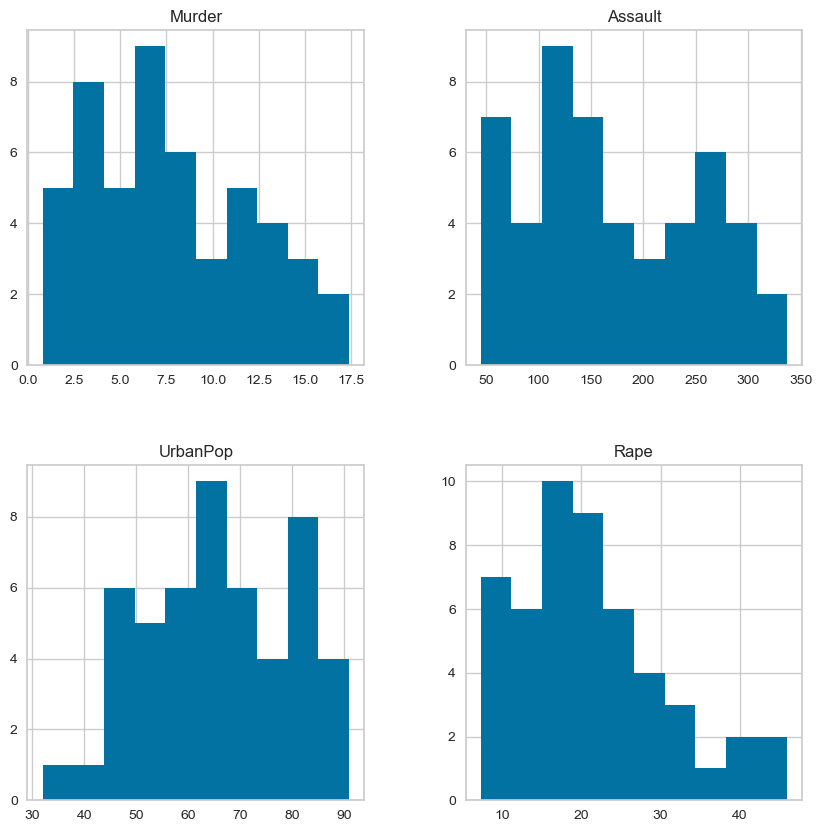

In [183]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

In [184]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [185]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\fatma zehra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from data
    for

In [186]:
k_fit = kmeans.fit(df)#elimizdeki veri setine fit ediyoruz.

In [187]:
k_fit.n_clusters #küme sayısını verir

4

In [188]:
k_fit.cluster_centers_ 
#oluşturulan kümelerin merkezlerini verir. 4 değişken olduğu için 4 kümeye ait 4 merkez verilmiş

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [189]:
k_fit.labels_ #gözlemlerin hangi kümeye ait olduğu bilgisini verir

array([0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

In [190]:
kumeler = k_fit.labels_

In [191]:
kumeler

array([0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

In [193]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:15]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,3
4,California,0
5,Colorado,3
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,3


In [194]:
df["kume_no"] = kumeler

In [195]:
df.head(15)

,Murder,Assault,UrbanPop,Rape,kume_no
,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0


In [196]:
df["kume_no"] = df["kume_no"] + 1

In [197]:
df.head(15)

,Murder,Assault,UrbanPop,Rape,kume_no
,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,4
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1


# Elbow ile Optimum Kume Sayısının Belirlenmesi
Kümeler arası benzerlikler maksimum kümeler arası benzerlikler minimum olacak şekilde en iyi küme sayısı bulunur

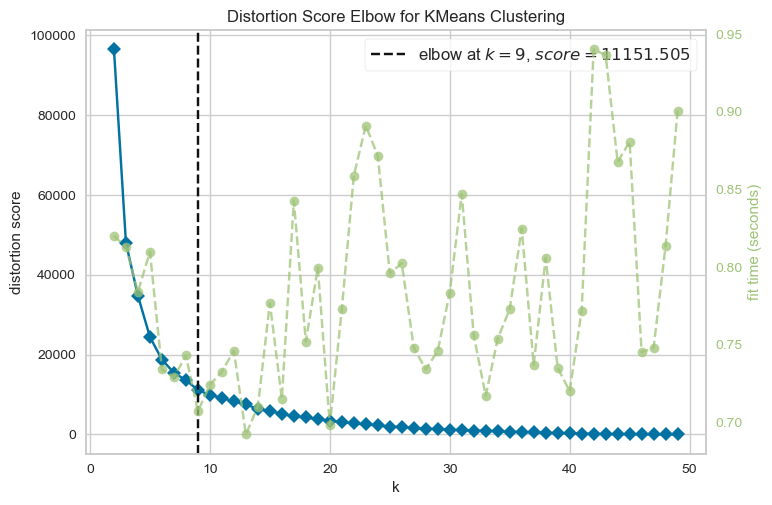

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [159]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50)).fit(df)
visualizer.poof()  

In [125]:
kmeans = KMeans(n_clusters = 9)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [126]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,6
1,Alaska,1
2,Arizona,7
3,Arkansas,5
4,California,7
5,Colorado,5
6,Connecticut,4
7,Delaware,6
8,Florida,3
9,Georgia,5


# Hiyerarşik Kümeleme

In [4]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = ""
df.head()

,Murder,Assault,UrbanPop,Rape
,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
#hc_average = linkage(df, "average")
#hc_single = linkage(df, "single")
#complete metodunu kullanalım

In [6]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

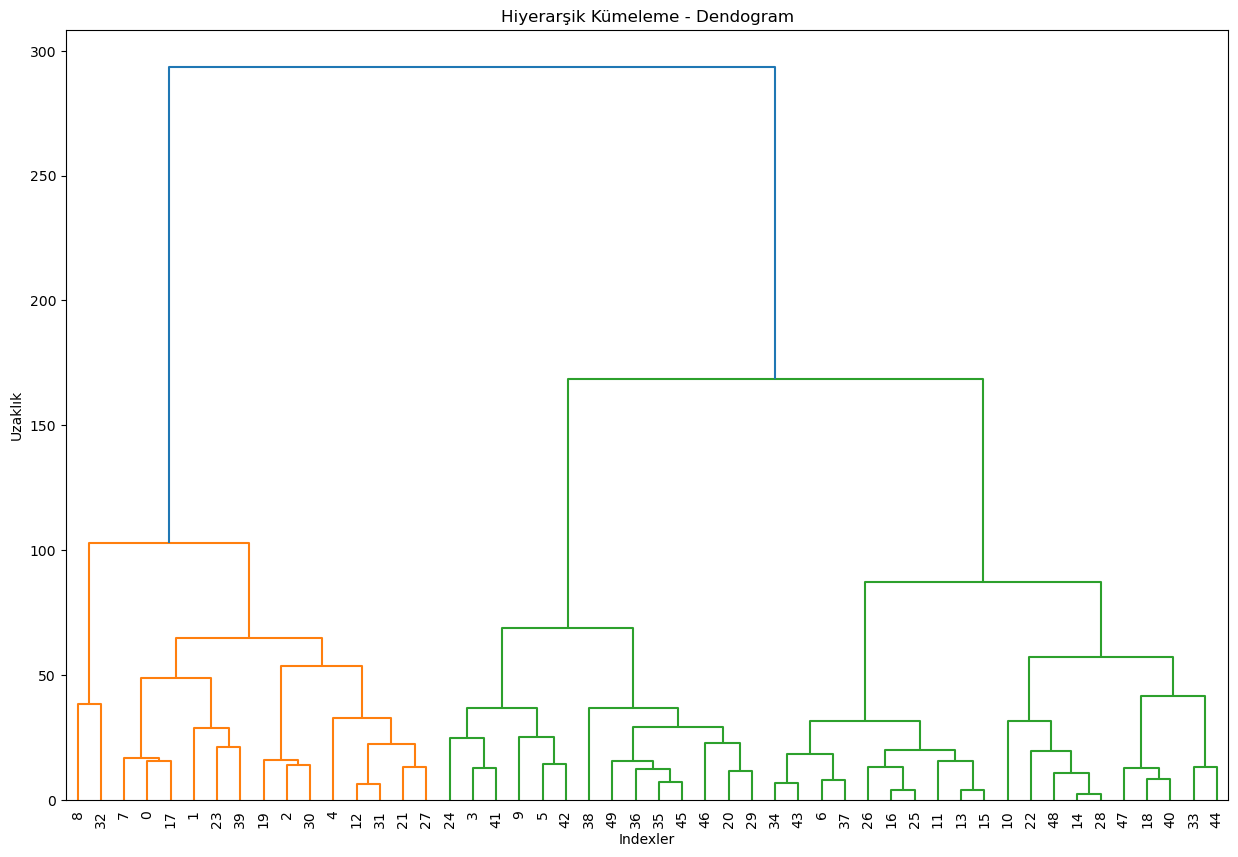

In [7]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

#complete metoduna göre bir dendrogram oluşturduk

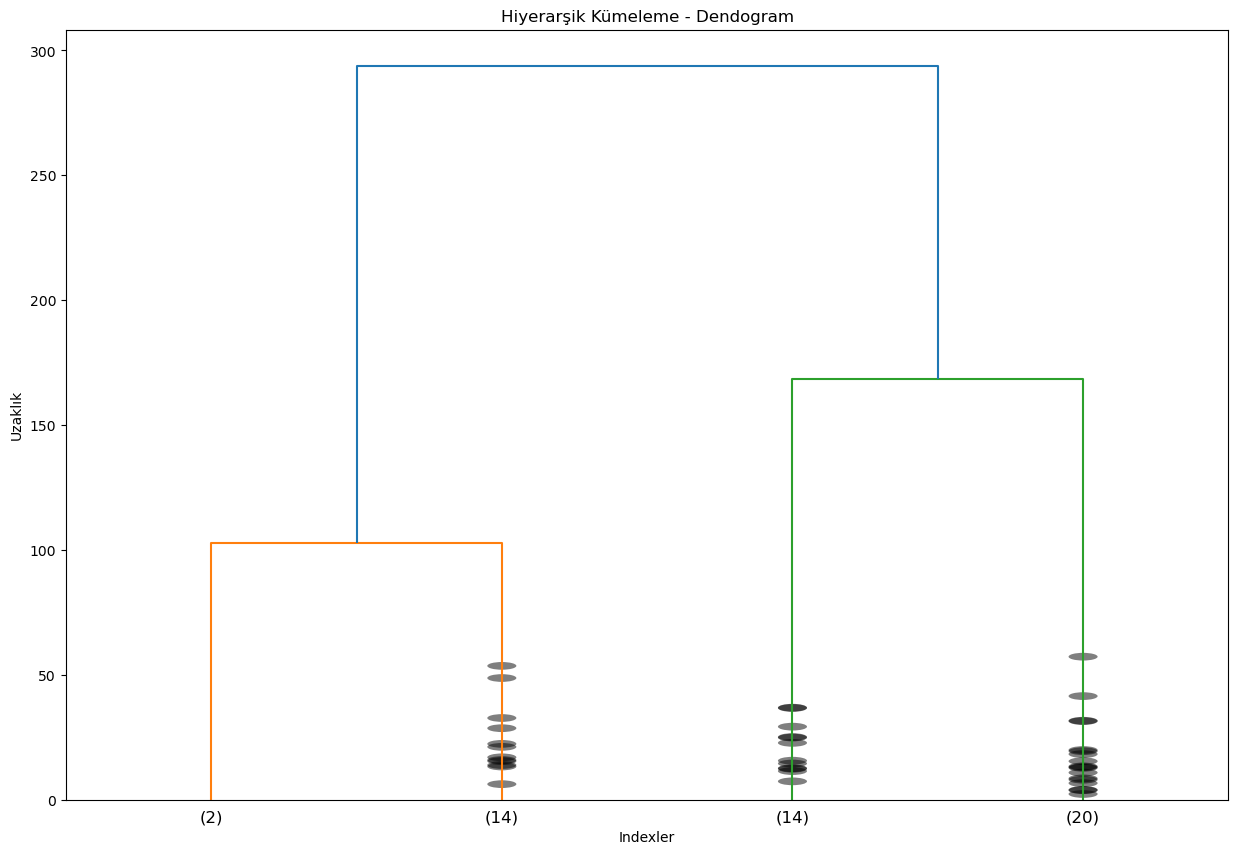

In [8]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Küme Sayısı

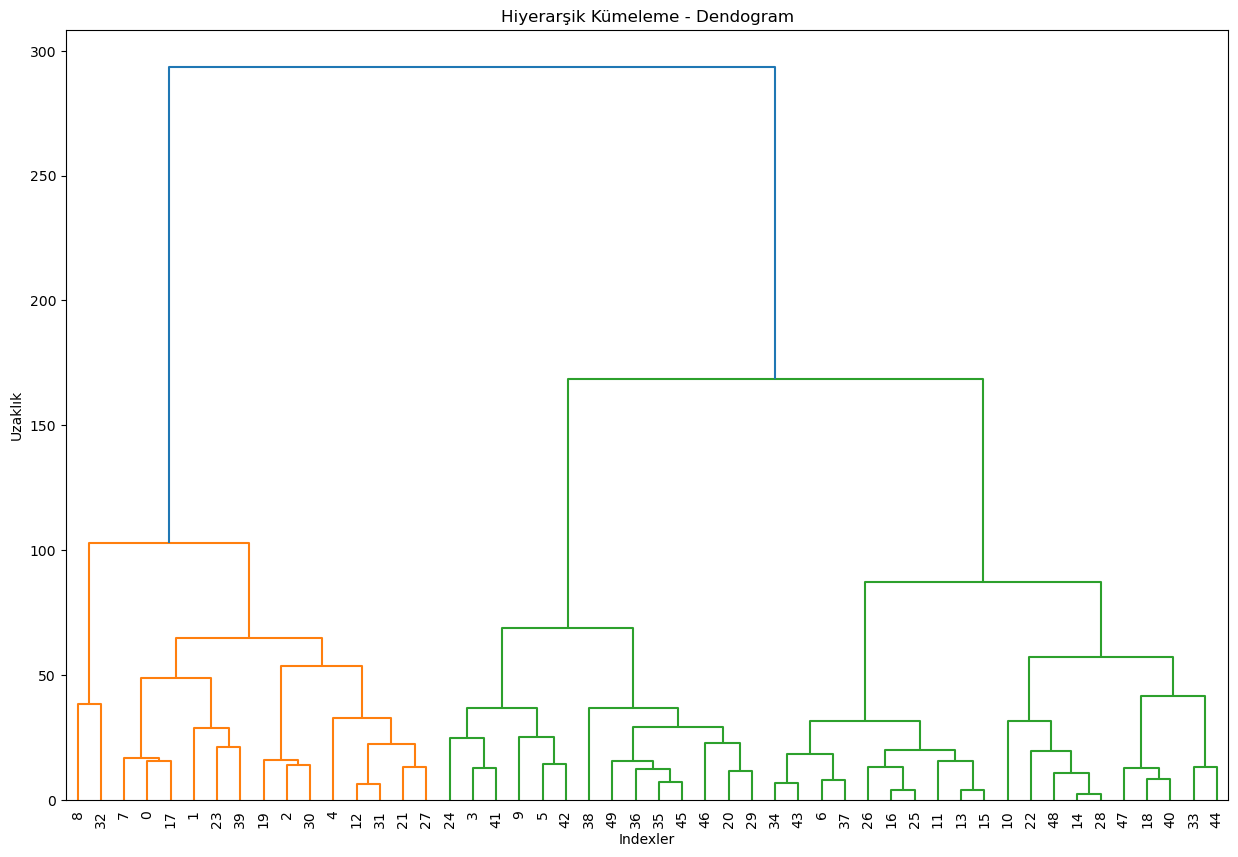

In [9]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);
#leaf_font_size; Yaprak etiketlerinin yazı tipi boyutunu belirtir

In [213]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

#uzaklık metriği: euclidean
#birleştirici hiyerarşik kümleme metodu olarak (linkage): ward

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [13]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [14]:
df["kume_no"] = cluster.fit_predict(df)

In [16]:
df.head(15)

,Murder,Assault,UrbanPop,Rape,kume_no
,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0


# PCA

In [57]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name =""
df.head()

,Murder,Assault,UrbanPop,Rape
,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [58]:
from warnings import filterwarnings
filterwarnings('ignore')

In [71]:
#PCA'yı uygulayabilmek adına öncelikle değişkenleri standartlaştırmamız gerekmektedir.
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit_transform(df)
#Elimizdeki veri setini 3 değişkenli hale getir

array([[ 0.98556588,  1.13339238, -0.44426879],
       [ 1.95013775,  1.07321326,  2.04000333],
       [ 1.76316354, -0.74595678,  0.05478082],
       [-0.14142029,  1.11979678,  0.11457369],
       [ 2.52398013, -1.54293399,  0.5985568 ],
       [ 1.51456286, -0.98755509,  1.09500699],
       [-1.35864746, -1.08892789, -0.64325757],
       [ 0.04770931, -0.32535892, -0.71863294],
       [ 3.01304227,  0.03922851, -0.57682949],
       [ 1.63928304,  1.2789424 , -0.34246008],
       [-0.91265715, -1.57046001,  0.05078189],
       [-1.63979985,  0.21097292,  0.25980134],
       [ 1.37891072, -0.68184119, -0.67749564],
       [-0.50546136, -0.15156254,  0.22805484],
       [-2.25364607, -0.10405407,  0.16456432],
       [-0.79688112, -0.2701647 ,  0.02555331],
       [-0.75085907,  0.95844029, -0.02836942],
       [ 1.56481798,  0.87105466, -0.78348036],
       [-2.39682949,  0.37639158, -0.06568239],
       [ 1.76336939,  0.42765519, -0.15725013],
       [-0.48616629, -1.4744965 , -0.609

In [61]:
pca_fit=pca.fit_transform(df)

In [62]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])
#yeni değişkenleri dataframe üzerinde göstermek için dataframe tanımladık

In [63]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [64]:
pca.explained_variance_ratio_
#yeni değişkenler gerçek veri setinin taşıdığı bilgiyi ne kadar taşıyor onu gösterir

array([0.62006039, 0.24744129, 0.0891408 ])

In [69]:
pca = PCA().fit(df)

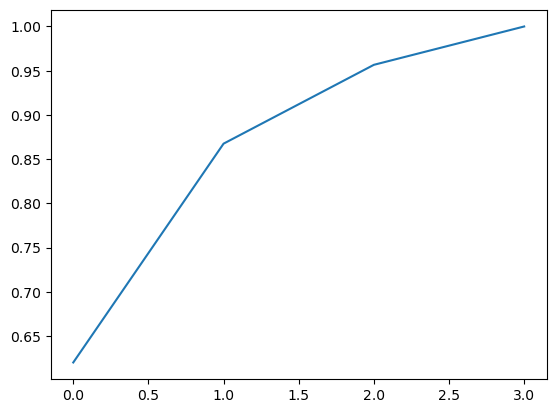

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))